In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import datasets
from matplotlib.colors import ListedColormap

# Используемые функции #

1) Функция реализации сигмоиды

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [2]:
def sigmoid(x, w=1):
    return 1 / (1 + np.exp(-w*x))

2) Функция реализации вычисления потерь

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}{\sigma( \left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln}({1 - \sigma( \left \langle w,x_{i} \right \rangle)}).$$

In [3]:
def log_loss(w, X, y):

    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / X.shape[1] * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / X.shape[1] * np.dot(X, (A - y).T)
    
    return loss, grad

3) Градиентный спуск
$$w_{n+1} = w_{n} - \eta \frac{1}{l}X(\sigma(wx)-Y)^{T},$$

In [4]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

4) Предсказание

In [5]:
def predict(w, X, p = 0.5):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    
    A = sigmoid(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > p): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= p):
            y_predicted[:, i] = 0
    
    return y_predicted

# Создание и подготовка данных

    1) Создаём данные.
    2) Перемешивваем данные, чтобы не было случайных закономерностей.
    3) Разделяем данные на тренировочную и тестовую выборки.

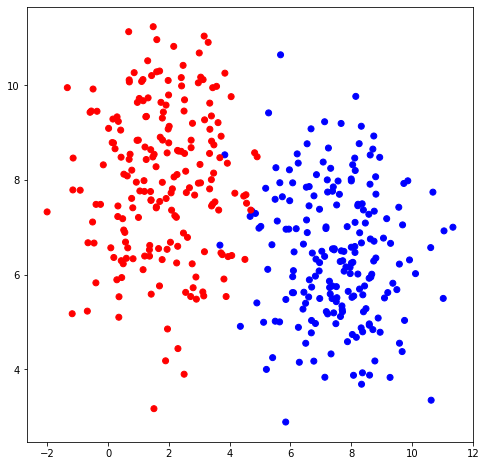

In [6]:
# classes = datasets.make_classification(n_samples=250, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
data = datasets.make_blobs(n_samples = 400, centers = 2, cluster_std = 1.5, random_state=20)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1], cmap=colors);

In [7]:
np.random.seed(12)
shuffle_index = np.random.permutation(data[0].shape[0])
X, y = data[0][shuffle_index], data[1][shuffle_index]

In [8]:
train_proportion = 0.7
train_board = int(len(data[0]) * train_proportion)

X_train, X_test, y_train, y_test = X[:train_board], X[train_board:], y[:train_board], y[train_board:]
    
print("Размер обучающей выборки", X_train.shape)
print("Размер тестовой выборки", X_test.shape)
print("Размер списка меток для обучающей выборки", y_train.shape)
print("Размер списка меток для тестовой выборки", y_test.shape)

Размер обучающей выборки (280, 2)
Размер тестовой выборки (120, 2)
Размер списка меток для обучающей выборки (280,)
Размер списка меток для тестовой выборки (120,)


In [9]:
X_train_tr = X_train.transpose()
'''changing'''
X_train_tr = np.append([[1] * X_train_tr.shape[1]], X_train_tr, axis=0)
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
'''changing'''
X_test_tr = np.append([[1] * X_test_tr.shape[1]], X_test_tr, axis=0)
y_test_tr = y_test.reshape(1, y_test.shape[0])

# Обучение

In [15]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.1

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
# print(w)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-0.4922226 ]
 [ 2.29720471]
 [-1.41950999]]
Точность на обучающей выборке: 98.929
Точность на тестовой выборке: 95.833


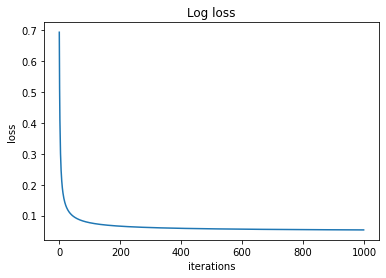

In [17]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

# Строим гиперплоскость #

In [19]:
x_cor = [min(X_train_tr[1]), max(X_train_tr[1])]
'''changing'''
y_cor = [- w[1] / w[2] * x - w[0] / w[2] for x in x_cor]
'''comment out, if uncomment the up''';
# y_cor = [- w[0] / w[1] * x for x in x_cor]

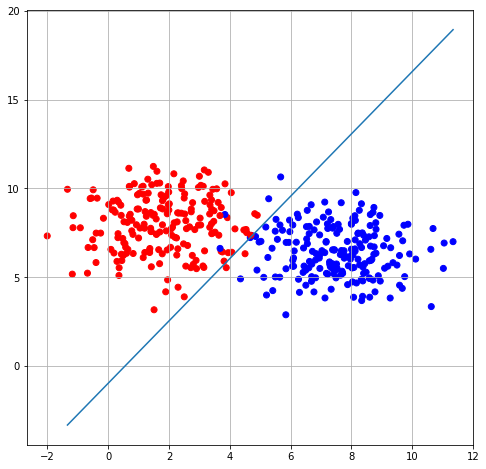

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(x_cor, y_cor)
ax.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1], cmap=colors);
ax.grid()